In [ ]:
import tensorflow as tf
import numpy as np
from keras import models,layers,optimizers
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train,y_train), (X_test,y_test) = cifar10.load_data()
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/255.0

X_train.shape

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
#Xavier Initialization
model1 = models.Sequential()

model1.add(layers.Flatten(input_shape=(32,32,3)))

model1.add(layers.Dense(256,activation='relu',kernel_initializer='glorot_uniform'))
model1.add(layers.Dense(256,activation='relu',kernel_initializer='glorot_uniform'))

model1.add(layers.Dense(10,activation='softmax',kernel_initializer='glorot_uniform'))


In [3]:
#Kaiming Initialization
model2 = models.Sequential()

model2.add(layers.Flatten(input_shape=(32,32,3)))

model2.add(layers.Dense(256,activation='relu',kernel_initializer='he_normal'))
model2.add(layers.Dense(128,activation='relu',kernel_initializer='he_normal'))

model2.add(layers.Dense(10,activation='softmax',kernel_initializer='he_normal'))


In [4]:
#With dropout Layer
model3 = models.Sequential()
model3.add(layers.Flatten(input_shape=(32,32,3)))

model3.add(layers.Dense(256,activation='relu',kernel_initializer='glorot_uniform'))
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(128,activation='relu'))

model3.add(layers.Dense(10,activation='softmax'))


In [5]:
# with batch normalization
model4 = models.Sequential()
model4.add(layers.Flatten(input_shape=(32,32,3)))
model4.add(layers.Dense(256,activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Activation('relu'))
model4.add(layers.Dense(10,activation='softmax'))

In [6]:
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model1.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model1.summary())
Xavier_history  = model1.fit(X_train,y_train,epochs=15,batch_size=32,validation_split=0.2)
Xavier_score = model1.evaluate(X_test,y_test,batch_size=32)
print(Xavier_score)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,050 (3.26 MB)

 Trainable params: 855,050 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2679 - loss: 1.9878 - val_accuracy: 0.3643 - val_loss: 1.7679
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3852 - loss: 1.7175 - val_accuracy: 0.3949 - val_loss: 1.6737
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4020 - loss: 1.6630 - val_accuracy: 0.3835 - val_loss: 1.7140
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4289 - loss: 1.5899 - val_accuracy: 0.4255 - val_loss: 1.6110
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4363 - loss: 1.5684 - val_accuracy: 0.4400 - val_loss: 1.5797
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4409 - loss: 1.5565 - val_accuracy: 0.4304 - val_loss: 1.6296
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4511 - loss: 1.5243 - val_accuracy: 0.4301 - val_loss: 1.6154
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4622 - loss: 1.49

In [7]:
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model2.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model2.summary())
Kaiming_history  = model2.fit(X_train,y_train,epochs=15,batch_size=32,validation_split=0.2)
Kaiming_score = model2.evaluate(X_test,y_test,batch_size=128)
print(Kaiming_score)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2671 - loss: 2.0001 - val_accuracy: 0.3579 - val_loss: 1.7943
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3663 - loss: 1.7578 - val_accuracy: 0.3785 - val_loss: 1.7371
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4017 - loss: 1.6706 - val_accuracy: 0.4100 - val_loss: 1.6634
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4179 - loss: 1.6180 - val_accuracy: 0.4207 - val_loss: 1.6305
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4301 - loss: 1.5897 - val_accuracy: 0.4266 - val_loss: 1.6071
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4415 - loss: 1.5654 - val_accuracy: 0.4341 - val_loss: 1.6005
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4464 - loss: 1.5414 - val_accuracy: 0.4359 - val_loss: 1.6067
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4471 - loss: 1.53

In [8]:
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model3.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model3.summary())

dropout_history  = model3.fit(X_train,y_train,epochs=15,batch_size=32,validation_split=0.2)
dropout_score = model3.evaluate(X_test,y_test,batch_size=128)
print(dropout_score)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2266 - loss: 2.0835 - val_accuracy: 0.3028 - val_loss: 1.9105
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3005 - loss: 1.9046 - val_accuracy: 0.3307 - val_loss: 1.8258
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3267 - loss: 1.8360 - val_accuracy: 0.3523 - val_loss: 1.7899
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3386 - loss: 1.8074 - val_accuracy: 0.3531 - val_loss: 1.7540
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3590 - loss: 1.7638 - val_accuracy: 0.3940 - val_loss: 1.6992
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3622 - loss: 1.7544 - val_accuracy: 0.4018 - val_loss: 1.6851
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3763 - loss: 1.7152 - val_accuracy: 0.3940 - val_loss: 1.6899
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3825 - loss: 1.70

In [9]:
sgd_optimizer = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model4.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model4.summary())

BN_history = model4.fit(X_train,y_train,epochs=15,batch_size=128,validation_split=0.2)
BN_score = model4.evaluate(X_test,y_test,batch_size=128)
print(BN_score)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 790,282 (3.01 MB)

 Trainable params: 789,770 (3.01 MB)

 Non-trainable params: 512 (2.00 KB)

None
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3477 - loss: 1.8662 - val_accuracy: 0.3777 - val_loss: 1.7701
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4523 - loss: 1.5808 - val_accuracy: 0.3621 - val_loss: 1.8488
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4820 - loss: 1.4961 - val_accuracy: 0.3859 - val_loss: 1.8069
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4916 - loss: 1.4523 - val_accuracy: 0.4214 - val_loss: 1.6564
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5008 - loss: 1.4313 - val_accuracy: 0.4086 - val_loss: 1.7419
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5141 - loss: 1.3890 - val_accuracy: 0.3920 - val_loss: 1.8303
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5236 - loss: 1.3561 - val_accuracy: 0.4122 - val_loss: 1.7400
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5352 - loss: 1.3354 - val_accurac

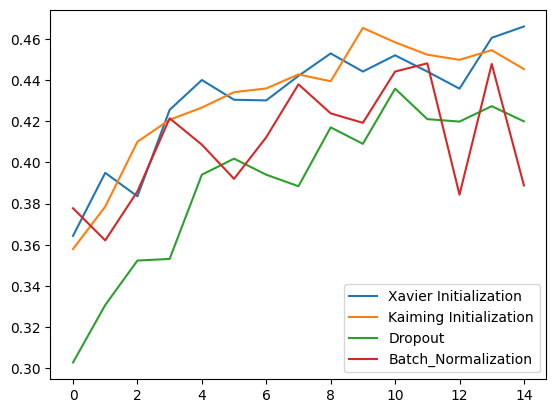

In [10]:
import matplotlib.pyplot as plt

plt.plot(Xavier_history.history['val_accuracy'],label='Xavier Initialization')
plt.plot(Kaiming_history.history['val_accuracy'],label='Kaiming Initialization')
plt.plot(dropout_history.history['val_accuracy'],label='Dropout')
plt.plot(BN_history.history['val_accuracy'],label='Batch_Normalization')
plt.legend()
plt.show()